In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
np.set_printoptions(threshold=300)

In [111]:
from proj1_helpers import load_csv_data, predict_labels, create_csv_submission
from implement import modeling
from preprocessing import dataprocessing, split_categories
from select_features import best_set_of_features
from other import plot_train_test
import math

## Load and process data

Load data

In [67]:
y_train, x_train, ids_train = load_csv_data('train.csv', sub_sample=False)
_,      x_test,   ids_test  = load_csv_data('test.csv',  sub_sample=False)

Create categories

In [68]:
cat_0_tri, cat_1_tri, cat_2_tri, cat_3_tri, idx_0_tr, idx_1_tr, idx_2_tr, idx_3_tr = split_categories(x_train)
cat_0_tei, cat_1_tei, cat_2_tei, cat_3_tei, idx_0_te, idx_1_te, idx_2_te, idx_3_te = split_categories(x_test)

y_train_0 = y_train[idx_0_tr]
y_train_1 = y_train[idx_1_tr] 
y_train_2 = y_train[idx_2_tr]
y_train_3 = y_train[idx_3_tr]

Preprocess the data, create features

In [209]:
trx_0, tex_0= dataprocessing(cat_0_tri,cat_0_tei,idx_0_tr,idx_0_te,deg0=3,adddegree0=1,sqrt0=1,comb0=1)

C:\Users\Audrey\Documents\EPFL\Cours\MachineLearning\MachineLearningProject1\preprocessing.py:114: RuntimeWarning: invalid value encountered in power
  


In [210]:
trx_1, tex_1= dataprocessing(cat_1_tri,cat_1_tei,idx_1_tr,idx_1_te,deg0=3,adddegree0=1,sqrt0=1,comb0=1)

C:\Users\Audrey\Documents\EPFL\Cours\MachineLearning\MachineLearningProject1\preprocessing.py:114: RuntimeWarning: invalid value encountered in power
  


In [211]:
trx_2, tex_2= dataprocessing(cat_2_tri,cat_2_tei,idx_2_tr,idx_2_te,deg0=3,adddegree0=1,sqrt0=1,comb0=1)

C:\Users\Audrey\Documents\EPFL\Cours\MachineLearning\MachineLearningProject1\preprocessing.py:114: RuntimeWarning: invalid value encountered in power
  


In [212]:
trx_3, tex_3= dataprocessing(cat_3_tri,cat_3_tei,idx_3_tr,idx_3_te,deg0=3,adddegree0=1,sqrt0=1,comb0=1)

C:\Users\Audrey\Documents\EPFL\Cours\MachineLearning\MachineLearningProject1\preprocessing.py:114: RuntimeWarning: invalid value encountered in power
  


Find the best features

In [215]:
features_0 = best_set_of_features(trx_0,y_train_0,lambda_0)

KeyboardInterrupt: 

In [ ]:
features_1 = best_set_of_features(trx_1,y_train_1,lambda_1)

In [ ]:
features_2 = best_set_of_features(trx_2,y_train_2,lambda_2)

In [ ]:
features_3 = best_set_of_features(trx_3,y_train_3,lambda_3)

In [ ]:
trx_fast_0 = trx_0[:,features_0]
trx_fast_1 = trx_1[:,features_1]
trx_fast_2 = trx_2[:,features_2]
trx_fast_3 = trx_3[:,features_3]

tex_fast_0 = tex_0[:,features_0]
tex_fast_1 = tex_1[:,features_1]
tex_fast_2 = tex_2[:,features_2]
tex_fast_3 = tex_3[:,features_3]

In [ ]:
print(features_0,"\n",features_1,"\n",features_2,"\n",features_3)

In [171]:
print(features_0,"\n",features_1,"\n",features_2,"\n",features_3)

[0, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 50] 
 [64, 70, 140, 139, 138, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 125, 124, 20, 19] 
 [198, 171, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64] 
 [0, 171, 195, 194, 193, 192, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152]


## Ridge regression Lambda

Define the parameters of the algorithm

The best lambda is 0.05150678076168122 with valid test 0.25234387044951884
And the loss on the whole train data is 0.8376332251593487


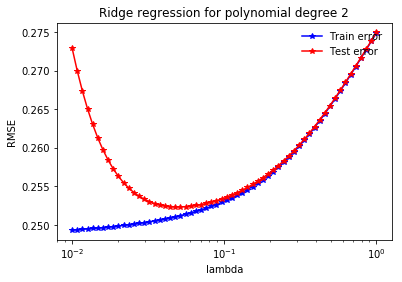

In [205]:
w_best_0,lambda_0 = modeling(trx_fast_0,y_train_0,num_intervals_lambda=60, nb_fold=10,nb_crossvalid=3,min_range=-2,max_range=0)

The best lambda is 0.0007609496685459883 with valid test 0.27290212473879993
And the loss on the whole train data is 0.9120910911628891


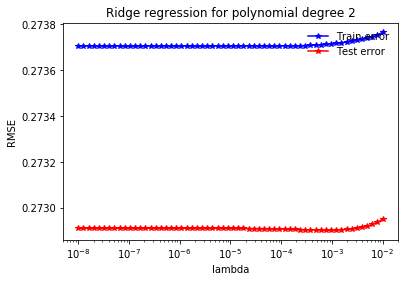

In [206]:
w_best_1,lambda_1 = modeling(trx_fast_1,y_train_1,num_intervals_lambda=60, nb_fold=10,nb_crossvalid=3,min_range=-8,max_range=-2)

The best lambda is 0.04406236427773573 with valid test 0.2627071820269775
And the loss on the whole train data is 0.8742340685811167


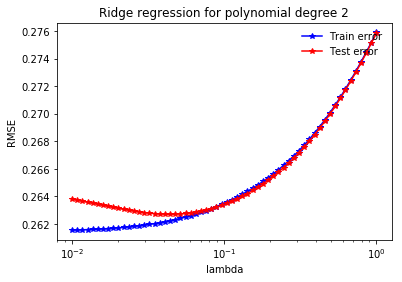

In [207]:
w_best_2,lambda_2 = modeling(trx_fast_2,y_train_2,num_intervals_lambda=60, nb_fold=10,nb_crossvalid=3,min_range=-2,max_range=0)

The best lambda is 0.002632321815662538 with valid test 0.26606299823658763
And the loss on the whole train data is 0.8815258868957032


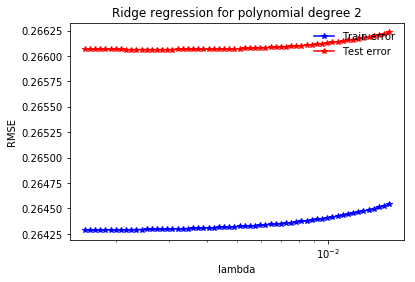

In [208]:
w_best_3,lambda_3 = modeling(trx_fast_3,y_train_3,num_intervals_lambda=60, nb_fold=10,nb_crossvalid=3,min_range=-2.8,max_range=-1.8)

## Prediction with the best model

Create prediction for each category

In [202]:
y_0_te = predict_labels(w_best_0,tex_fast_0)
y_1_te = predict_labels(w_best_1,tex_fast_1)
y_2_te = predict_labels(w_best_2,tex_fast_2)
y_3_te = predict_labels(w_best_3,tex_fast_3)

Reconstruct y in order

In [203]:
order_tab = np.concatenate((idx_0_te, idx_1_te, idx_2_te, idx_3_te))
order_idx = np.argsort(order_tab, axis=0)
y_unordered = np.concatenate((y_0_te, y_1_te, y_2_te, y_3_te))
y_pred = y_unordered[order_idx]

Create submission

In [204]:
create_csv_submission(ids_test, y_pred, "submission.csv")